# Task 2: Risk Rating
## Problem Description
- Problem: there are too many clients in our customer database and heterogeneous, we would like
to automate this process to be as efficient and reliable as possible
- Ask: using predictive modelling classify all 1M customers into three risk buckets: **Low,
Medium and High**. As features, you must use KYC data and transactional data, your **target
variable is the risk rating provided**
- Diagram: ![task2_dia](https://drive.google.com/file/d/1Bzj2tn8QEObICYKvw7km2TfIMPKK-UIq/view?usp=sharing)

## Datasets
### Nodes Data
Description: main data source for this competition, contains KYC, Transactional data and Risk
Rating
- File name: UofT_nodes.csv -> df_origin -> **df_kyc**
- Number of Rows: 1M, one row per CUSTOMER_ID
- Number of Columns: 20 columns (1 target column); RISK = Target variable for Task 2

### Edges Data
Description: shows the connections between clients i.e. amount of money sent via EMT from
one customer (source) to another (target)
- File name: UofT_edges.csv
- Number of Rows: 466k

### Occupation Data
Description: lookup table that maps an occupation (code) to their risk level of being
involved in financial crimes
- File name: UofT_occupation_risk.csv
- Number of Rows: 841

## Exploratory Data Analysis
### Library

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = '/content/drive/MyDrive/AI/UofT_nodes.csv'
df = pd.read_csv(file_path,  dtype=str)
df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.5710000000001,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.0,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.0,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.612999999998,8.0,3399.0,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0


In [8]:
print('--------------View Columns--------------')
print('Number of Columns:', len(df.columns))
print(df.columns.tolist())
print('--------------NULL & NaN Check--------------')
for i in range(len(df.columns)):
    col = df.columns[i]
    if df[col].isnull().values.any():
        print(col, 'contains %d NULL' % df[col].isnull().values.sum())
    if df[col].values.dtype != 'O':
        if np.isnan(df[col].values).any():
            print(col, 'contains %d NaN' % np.isnan(df[col].values).sum())

--------------View Columns--------------
Number of Columns: 20
['BIRTH_DT', 'CUST_ADD_DT', 'OCPTN_NM', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_CNT_IN', 'CASH_SUM_OUT', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_CNT_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_OUT', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'RISK', 'NAME', 'GENDER', 'CUSTOMER_ID']
--------------NULL & NaN Check--------------
CUST_ADD_DT contains 4178 NULL
OCPTN_NM contains 6384 NULL
NAME contains 660 NULL
GENDER contains 628 NULL


In [9]:
df = df.dropna(how='any', axis=0)

## Machine Learning Models
### Library

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import urllib
from scipy.stats import chi2_contingency
plt.style.use('ggplot')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sb
from sklearn.metrics import make_scorer, confusion_matrix

In [11]:
file_path = '/content/UofT_nodes.csv'
df = pd.read_csv(file_path,  dtype=str)

In [12]:
df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.5710000000001,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.0,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.0,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.612999999998,8.0,3399.0,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0


In [13]:
df.count().isnull().sum()

0

In [14]:
df['COUNTRY_RISK_INCOME'] = df['COUNTRY_RISK_INCOME'].astype('category').cat.codes

In [15]:
df['COUNTRY_RISK_RESIDENCY'] = df['COUNTRY_RISK_RESIDENCY'].astype('category').cat.codes
df['RISK'] = df['RISK'].replace(['low'], 0)
df['RISK'] = df['RISK'].replace(['medium'], 1)
df['RISK'] = df['RISK'].replace(['high'], 2)
df['GENDER'] = df['GENDER'].astype('category').cat.codes

In [16]:
df['COUNTRY_RISK_INCOME'].unique()
df['COUNTRY_RISK_RESIDENCY'].unique()
df['RISK'].unique()

array([0, 1, 2])

In [17]:
df['GENDER'].unique()

array([ 0,  1, -1], dtype=int8)

In [18]:
df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,1,1,0,"Young, Marie Mildren Coleman",0,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,1,1,0,Mark Stupar Lecy,1,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.5710000000001,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,1,1,0,Dean Glasper Wendel Reeves,1,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,1,1,0,"Hulsey, Linda Rauth",0,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,1,1,0,Carolyn Washington Roberts,0,418265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.0,21.0,1186467.0,25.0,2550098.0,174.0,1,0,2,Bret* Dove Gainey,1,420884.0
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,1,1,0,Anthony Ray Montano Gomez,1,429418.0
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.0,19.0,3024271.0,68.0,948981.0,124.0,1,0,2,Bernadette Schofield Pace Mile,0,731360.0
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.612999999998,8.0,3399.0,5.0,943477.0,9.0,376429.0,12.0,1,0,2,"Wasson, Russell Terrell",1,837988.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   BIRTH_DT                1000000 non-null  object
 1   CUST_ADD_DT             995822 non-null   object
 2   OCPTN_NM                993616 non-null   object
 3   RES_CNTRY_CA            1000000 non-null  object
 4   CNTRY_OF_INCOME_CA      1000000 non-null  object
 5   PEP_FL                  1000000 non-null  object
 6   CASH_SUM_IN             1000000 non-null  object
 7   CASH_CNT_IN             1000000 non-null  object
 8   CASH_SUM_OUT            1000000 non-null  object
 9   CASH_CNT_OUT            1000000 non-null  object
 10  WIRES_SUM_IN            1000000 non-null  object
 11  WIRES_CNT_IN            1000000 non-null  object
 12  WIRES_SUM_OUT           1000000 non-null  object
 13  WIRES_CNT_OUT           1000000 non-null  object
 14  COUNTRY_RISK_INCOME

In [20]:
for i in range(2, 13):
  df.iloc[:, i] = df.iloc[:, i].astype(float)

In [21]:
df.dtypes

BIRTH_DT                   object
CUST_ADD_DT                object
OCPTN_NM                  float64
RES_CNTRY_CA              float64
CNTRY_OF_INCOME_CA        float64
PEP_FL                    float64
CASH_SUM_IN               float64
CASH_CNT_IN               float64
CASH_SUM_OUT              float64
CASH_CNT_OUT              float64
WIRES_SUM_IN              float64
WIRES_CNT_IN              float64
WIRES_SUM_OUT             float64
WIRES_CNT_OUT              object
COUNTRY_RISK_INCOME          int8
COUNTRY_RISK_RESIDENCY       int8
RISK                        int64
NAME                       object
GENDER                       int8
CUSTOMER_ID                object
dtype: object

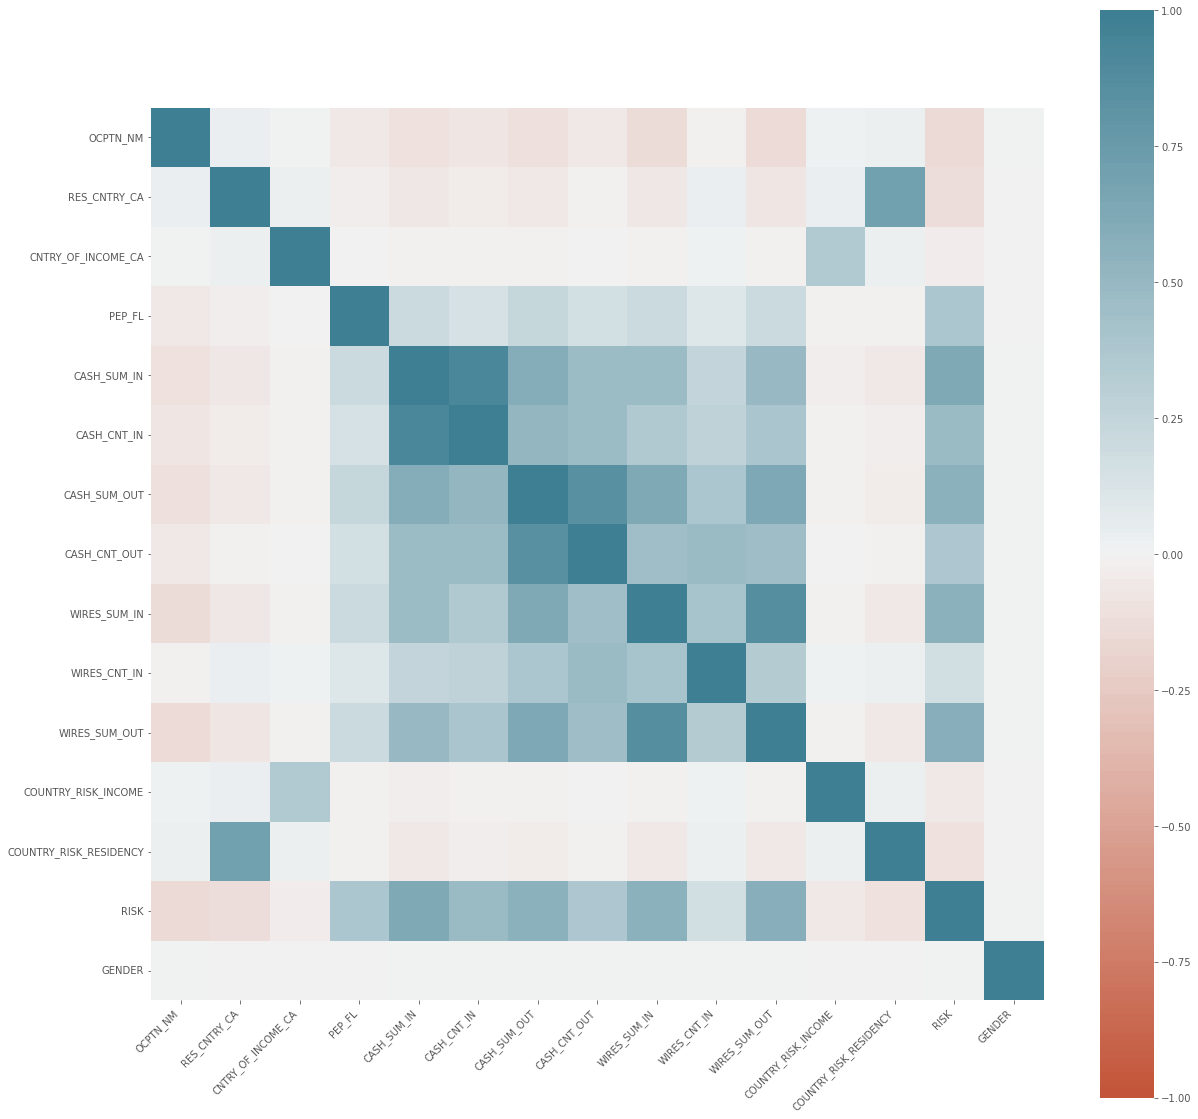

In [22]:
corr = df.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

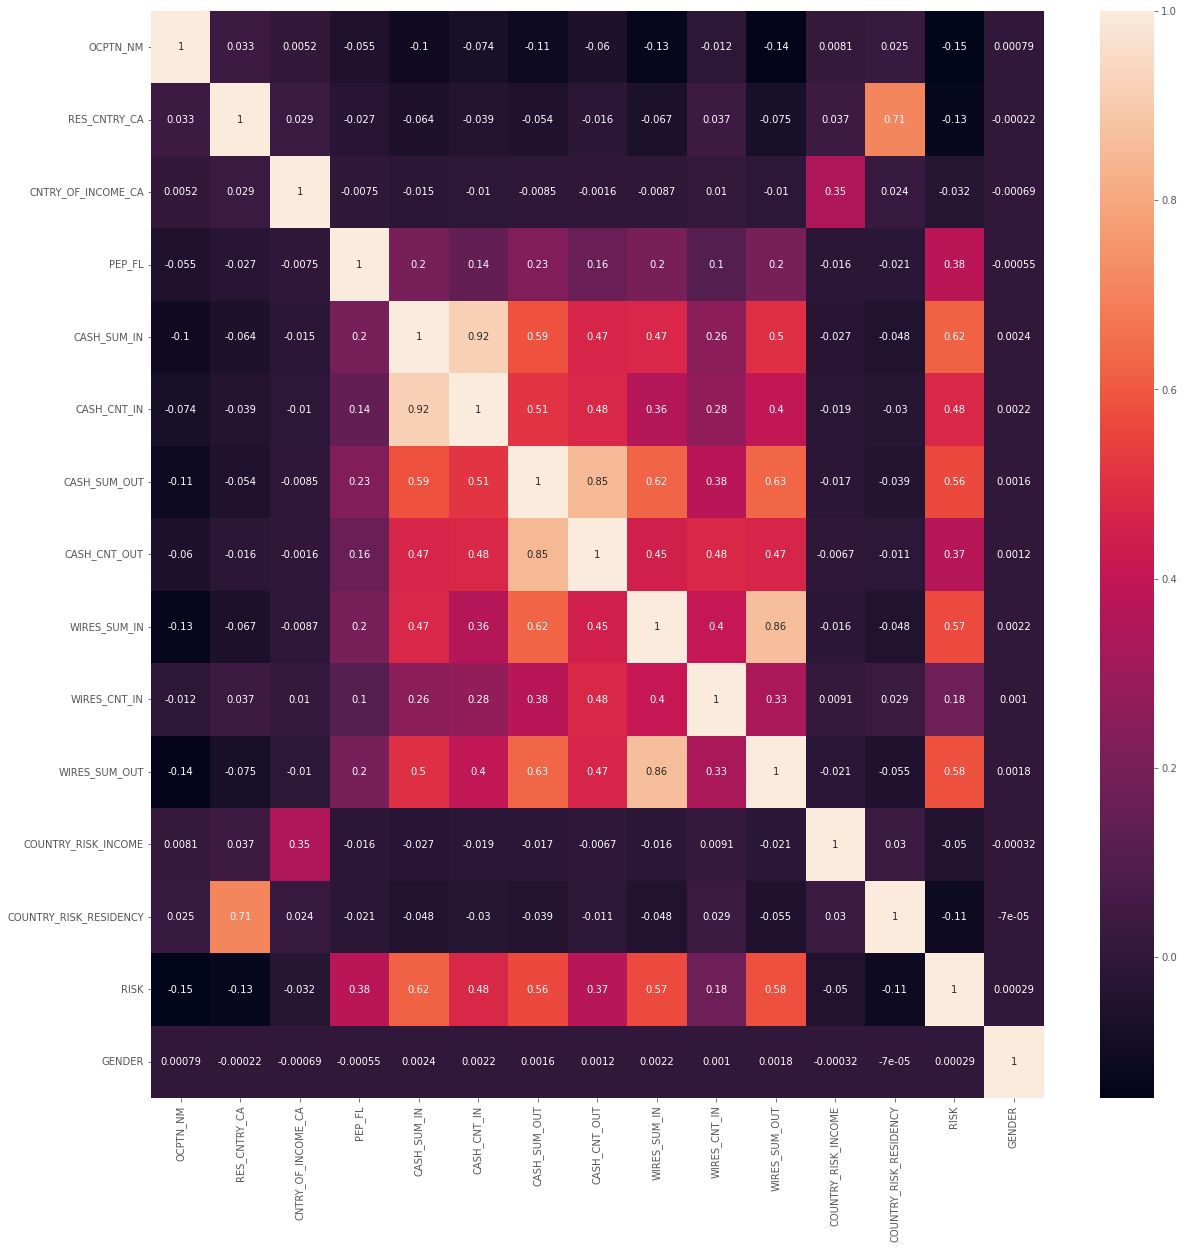

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [24]:
feature = ['PEP_FL', 'CASH_SUM_IN', 'CASH_CNT_IN', 'CASH_SUM_OUT', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_CNT_IN', 'WIRES_SUM_OUT']
df_new = df[feature]

In [25]:
df_new['RISK'] = df['RISK']
df_new

<ipython-input-25-2bb013e93abd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['RISK'] = df['RISK']


,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,RISK
0,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,0
1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,0
2,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,0
3,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,0
4,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,0
...,...,...,...,...,...,...,...,...,...
999995,0.0,18945.108,10.0,32210.000,21.0,1186467.0,25.0,2550098.0,2
999996,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,0
999997,0.0,2351.255,2.0,15997.000,19.0,3024271.0,68.0,948981.0,2
999998,0.0,27312.613,8.0,3399.000,5.0,943477.0,9.0,376429.0,2


In [26]:
train = df_new.sample(frac=0.7)
test = df_new.drop(train.index)
scaler = StandardScaler()

# Resampling + RF

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [30]:
X = train[feature]
y = train['RISK']

print("Original class distribution:")
print(pd.Series(y).value_counts())

Original class distribution:
0    420169
1    244846
2     34985
Name: RISK, dtype: int64


In [31]:
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)
print("\nRandom oversampling class distribution:")
print(pd.Series(y_resampled_ros).value_counts())


Random oversampling class distribution:
0    420169
1    420169
2    420169
Name: RISK, dtype: int64


In [32]:
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)
print("\nRandom undersampling class distribution:")
print(pd.Series(y_resampled_rus).value_counts())


Random undersampling class distribution:
0    34985
1    34985
2    34985
Name: RISK, dtype: int64


In [33]:
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
print("\nSMOTE class distribution:")
print(pd.Series(y_resampled_smote).value_counts())


smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X, y)
print("\nSMOTEENN class distribution:")
print(pd.Series(y_resampled_smoteenn).value_counts())


SMOTE class distribution:
0    420169
1    420169
2    420169
Name: RISK, dtype: int64

SMOTEENN class distribution:
0    403885
2    385418
1    339742
Name: RISK, dtype: int64


In [35]:
def train_evaluate_rf(X, y, title=""):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{title}\nAccuracy: {accuracy:.4f}\nF1-Score: {f1:.4f}\n")
    print(classification_report(y_test, y_pred))

train_evaluate_rf(X, y, title="Original Data")
train_evaluate_rf(X_resampled_ros, y_resampled_ros, title="Random Oversampling")
train_evaluate_rf(X_resampled_rus, y_resampled_rus, title="Random Undersampling")
train_evaluate_rf(X_resampled_smote, y_resampled_smote, title="SMOTE")
train_evaluate_rf(X_resampled_smoteenn, y_resampled_smoteenn, title="SMOTEENN")

Original Data
Accuracy: 0.9537
F1-Score: 0.9453

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126281
           1       0.90      0.97      0.94     73204
           2       0.60      0.25      0.36     10515

    accuracy                           0.95    210000
   macro avg       0.83      0.74      0.76    210000
weighted avg       0.94      0.95      0.95    210000

Random Oversampling
Accuracy: 0.9912
F1-Score: 0.9912

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126135
           1       1.00      0.97      0.99    125874
           2       0.97      1.00      0.99    126144

    accuracy                           0.99    378153
   macro avg       0.99      0.99      0.99    378153
weighted avg       0.99      0.99      0.99    378153

Random Undersampling
Accuracy: 0.8873
F1-Score: 0.8868

              precision    recall  f1-score   support

           0       0.99

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}\nF1-Score: {f1:.4f}\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9410
F1-Score: 0.9409

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126135
           1       0.95      0.87      0.91    125874
           2       0.88      0.96      0.92    126144

    accuracy                           0.94    378153
   macro avg       0.94      0.94      0.94    378153
weighted avg       0.94      0.94      0.94    378153



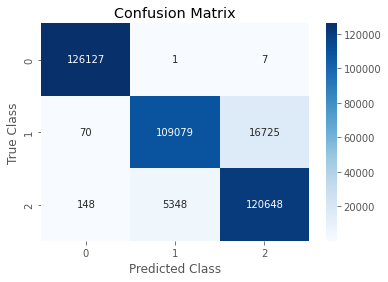

In [47]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
plt.show()

# Resampling + Log

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 0.8874
F1-Score: 0.8869

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126135
           1       0.88      0.78      0.82    125874
           2       0.80      0.89      0.84    126144

    accuracy                           0.89    378153
   macro avg       0.89      0.89      0.89    378153
weighted avg       0.89      0.89      0.89    378153



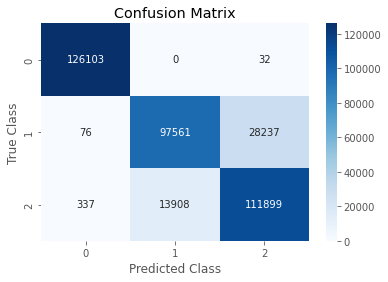

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
clf = LogisticRegression(multi_class='auto', solver='lbfgs')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}\nF1-Score: {f1:.4f}\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
plt.show()

# Resampling + DT


Accuracy: 0.8913
F1-Score: 0.8917

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    126135
           1       0.86      0.83      0.84    125874
           2       0.82      0.87      0.84    126144

    accuracy                           0.89    378153
   macro avg       0.89      0.89      0.89    378153
weighted avg       0.89      0.89      0.89    378153



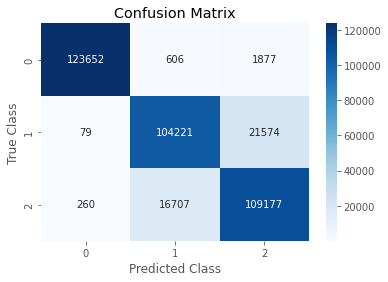

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}\nF1-Score: {f1:.4f}\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
plt.show()

# Log

In [ ]:
X = train[feature]
y = train['RISK']

kf = KFold(n_splits=10)
results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)    
    
    model = LogisticRegression(multi_class='auto', solver='lbfgs')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append(accuracy)

avg_accuracy = np.mean(results)
print('Average accuracy:', avg_accuracy)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Average accuracy: 0.9505542857142857


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
avg_accuracy = np.mean(results)
print('Average accuracy:', avg_accuracy)

Average accuracy: 0.9505542857142857


In [ ]:
best_model = LogisticRegression(multi_class='auto', solver='lbfgs')
scaler = StandardScaler()

X_train = train[feature]
y_train = train['RISK']

X_test = test[feature]
y_test = test['RISK']


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)

accuracy: 0.9501866666666666
precision: 0.9386366721457444
recall: 0.9501866666666666


# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = train[feature]
y = train['RISK']

kf = KFold(n_splits=10)
results = []

X = scaler.fit_transform(X)
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the data
clf.fit(X, y)

# Make predictions using the trained model
y_pred = clf.predict(X)

In [ ]:
X_train = train[feature]
y_train = train['RISK']

X_test = test[feature]
y_test = test['RISK']


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

In [ ]:
print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)

accuracy: 0.95371
precision: 0.9450126495046363
recall: 0.95371


# Decision Tree

In [ ]:
X = train[feature]
y = train['RISK']

kf = KFold(n_splits=10)
results = []

X = scaler.fit_transform(X)
clf = DecisionTreeClassifier()

# Fit the model to the data
clf.fit(X, y)

X_train = train[feature]
y_train = train['RISK']

X_test = test[feature]
y_test = test['RISK']


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

In [ ]:
print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)

accuracy: 0.9365266666666666
precision: 0.9375031332257667
recall: 0.9365266666666666
